**_Check out the Strength of Association heatmap at the end of this notebook!_**

# Initialization

In [1]:
from bmb import ProcessingDB
from bmb.source.cross_classification import category_pairs
from bmb.source.analysis import visualize_categorical_association
from tqdm.notebook import tqdm
from collections import defaultdict
import random

db       = ProcessingDB()
film_ids = db.get( 'SELECT id FROM Film WHERE year > 1930 AND status in (1, 2)')

# Load Genre Combinations

In [2]:
genre_combinations = dict()
GENRES_FOR_FILM_ID = """
    SELECT Genre.text 
    FROM FilmGenre JOIN Genre ON FilmGenre.Genre=Genre.id 
    WHERE FilmGenre.film=?"""
for film_id in tqdm( film_ids):
    genre_combinations[ film_id] = db.get( GENRES_FOR_FILM_ID, film_id )

  0%|          | 0/21492 [00:00<?, ?it/s]

# Create Category Association Data

In [3]:
from collections import defaultdict

num_films    = len( genre_combinations)
genre_pairs  = list()
genre_count  = defaultdict( lambda: 0)
year_count   = defaultdict( lambda: 0)
decade_count = defaultdict( lambda: 0)

year_genres = list()
for film_id, genre_combination in tqdm(genre_combinations.items()):
    genre_pairs += category_pairs( genre_combination, reflexive=True)
    
    year = db.select_one( 'year', 'Film', id=film_id)
    year_count[ year] += 1
    
    decade = f"{(year // 10) * 10}'s"
    decade_count[ decade] += 1

    if not isinstance( year, int):
        raise Exception( film_id)
    
    for genre in genre_combination:
        genre_count[ genre] += 1
        year_genres.append(( f"{(year // 10) * 10}'s", genre))
        

  0%|          | 0/21492 [00:00<?, ?it/s]

# Visualize

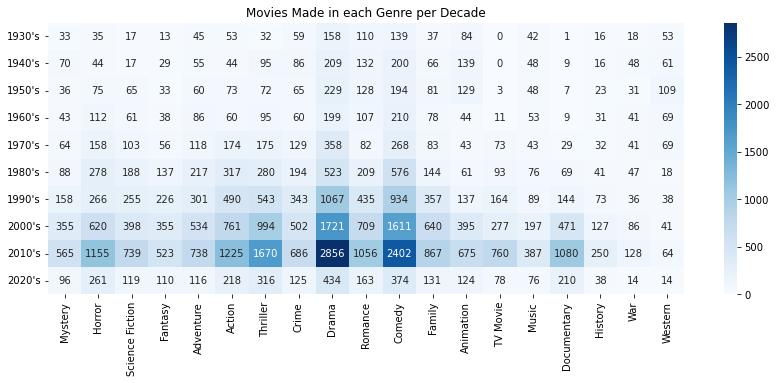

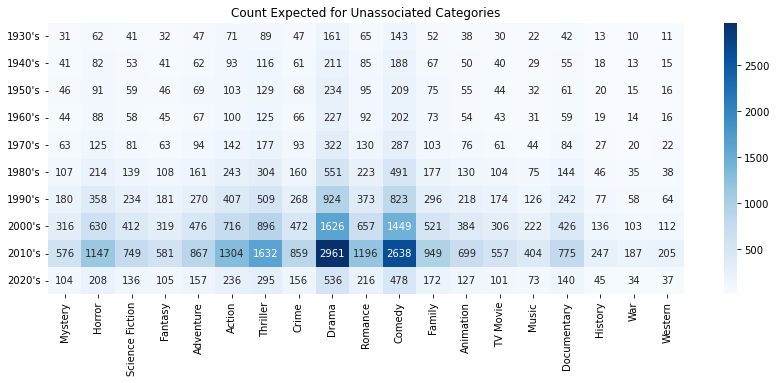

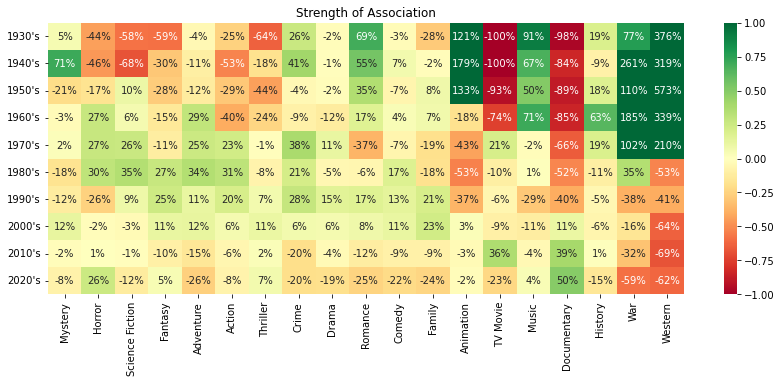

In [4]:
from bmb.source.analysis import visualize_categorical_association
visualize_categorical_association(
    year_genres,
    num_films,
    decade_count,
    genre_count,
    sorted(set((t[0] for t in year_genres))),
    db.genre_order(),#[ g for g in db.genre_order() if g not in ("Documentary", "TV Movie", "Western", "War")],#
    title="Movies Made in each Genre per Decade"
)

The Stregnth of Association heatmap shows the relative popularity of each genre in each decade.  Specifically, the percentage in each box is the relative error obtained from a Naive Beyesian prediction that assumes statistical independence between a film's release-decade and genres.  A few observations:

1. __The genre composition has been changing.__ The long-dominant "traditional genres" (Adventure, Action, Drama, Romance, Comedy) have been  in decline as Horror and Animation continue their comeback.  There are more documentaries, probably because streaming services release a lot of them.
1. __The 2020's data is skewed.__ I think that it is important to recognize that, since the COVID 19 pandemic has disrupted film releases, almost all of the 2020's data comes from streaming servies.  I believe that this has accelerated incresing trends, such as the increasing number of Documentaries and decline popularity of traditional genres.
1. __Westerns show the most dramatic change.__  Some time in the 70's, their popularity dropped significantly.  Although more Westerns were released in the 2010's than any decade since the 1970's, this is not a popularity spike but is a result of the larger number of films that are released overall.
1. __The ["Gold Age of American Animation"](https://en.wikipedia.org/wiki/Golden_age_of_American_animation) can be seen clearly.__  Furthermore, it appears that Animation has been making a bit of a come back in the 2000's as more traditional genres have been slumping.